In [1]:
# EXP4: THE BENCHMARK (ALL REAL)

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

In [5]:
# TRAIN - TEST - VALIDATION (REAL)
train_data = tf.keras.utils.image_dataset_from_directory(r"E:\bachelor\speed bumps\real", batch_size= 100)
data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()

Found 1706 files belonging to 2 classes.


In [6]:
data = train_data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.9450521 , 0.9960325 , 0.98818934],
          [0.9470588 , 0.99583334, 0.9879902 ],
          [0.9487745 , 0.99583334, 0.9879902 ],
          ...,
          [0.9070006 , 0.98543197, 0.9984222 ],
          [0.9161152 , 0.98929226, 0.99820775],
          [0.9386642 , 0.9993107 , 1.        ]],
 
         [[0.9465686 , 0.99534315, 0.9882353 ],
          [0.94558823, 0.99132967, 0.9846354 ],
          [0.94730395, 0.9906863 , 0.9843137 ],
          ...,
          [0.83278185, 0.9112132 , 0.94258577],
          [0.86469054, 0.9365809 , 0.9555147 ],
          [0.92446387, 0.9905331 , 0.99347425]],
 
         [[0.9585784 , 0.9967984 , 0.9938725 ],
          [0.95759803, 0.99019605, 0.9884804 ],
          [0.95931375, 0.9867647 , 0.9867647 ],
          ...,
          [0.6436734 , 0.7221048 , 0.75347733],
          [0.73131126, 0.8045956 , 0.8291054 ],
          [0.8476103 , 0.91427696, 0.92996323]],
 
         ...,
 
         [[0.40450367, 0.42803308, 0.37313113],
          [0.40214

In [17]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [18]:
len(data)

18

In [19]:
val_size

3

In [20]:
train_size

13

In [21]:
test_size

2

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

In [24]:
# THE MODEL
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#TRAINING
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 836ms/step - accuracy: 0.6344 - loss: 1.1036 - val_accuracy: 0.9367 - val_loss: 0.6130
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 826ms/step - accuracy: 0.9471 - loss: 0.5200 - val_accuracy: 0.9767 - val_loss: 0.3753
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 822ms/step - accuracy: 0.9678 - loss: 0.3904 - val_accuracy: 0.9833 - val_loss: 0.3030
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 828ms/step - accuracy: 0.9783 - loss: 0.3072 - val_accuracy: 0.9767 - val_loss: 0.2827
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 846ms/step - accuracy: 0.9842 - loss: 0.2657 - val_accuracy: 0.9933 - val_loss: 0.2154
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 837ms/step - accuracy: 0.9875 - loss: 0.2318 - val_accuracy: 0.9900 - val_loss: 0.2045
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 834ms/step - accuracy: 0.9906 - loss: 0.2088 - val_accuracy: 0.9967 - val_loss: 0.1822
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 835ms/step - accuracy: 0.9931 - loss: 0.1927 - val_accu

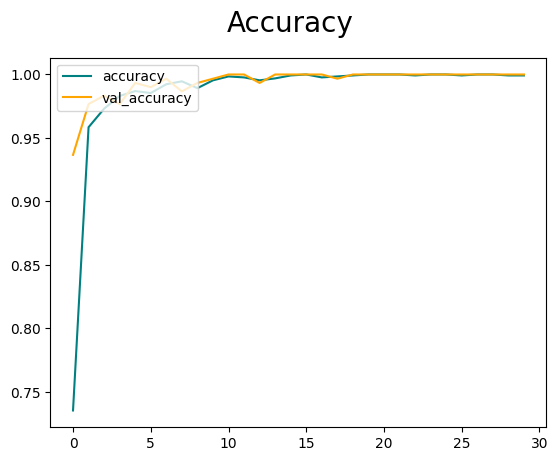

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

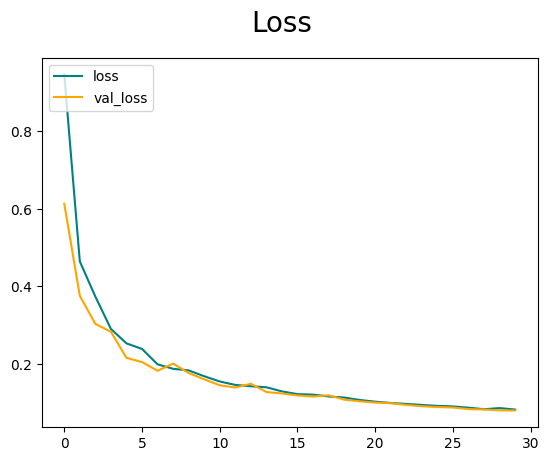

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [28]:
#TESTING
test_loss, test_acc = model.evaluate(test, verbose=1)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 1.0000 - loss: 0.0767
Test Accuracy: 1.0
Test Loss: 0.07651849091053009
